<a href="https://colab.research.google.com/github/knightligh/AI/blob/main/5_kinds_of_flowers_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras import preprocessing
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense
from numpy.ma.core import reshape


In [4]:
data="/content/drive/MyDrive/Hoa_Data/"

In [5]:
pixels,labels=list(),list()

for folder in listdir(data):
    if folder!='.DS_Store':
        print("Folder=",folder)
        for file in listdir(data  + folder):
            if file!='.DS_Store':
                #print("File=", file)
                pixel=load_img(data  + folder +"/" + file,target_size=(280,180))
                pixel=img_to_array(pixel)
                pixels.append(pixel)
                labels.append( folder)

pixels =asarray(pixels)
labels =asarray(labels)

Folder= apricot
Folder= daisy
Folder= lotus
Folder= Rose
Folder= water lily


# one_hot_encoding

In [6]:
from sklearn.preprocessing import LabelBinarizer
import pickle
from sklearn.model_selection import train_test_split
encoder = LabelBinarizer()
labels = encoder.fit_transform(labels)
#print(labels)

file = open('pix.data', 'wb')
# dump information to that file
pickle.dump((pixels,labels), file)
# close the file
file.close()

In [7]:
def load_data():
    file = open('pix.data', 'rb')
    # dump information to that file
    (pixels, labels) = pickle.load(file)
    # close the file
    file.close()
    return pixels, labels

#save_data()
X,y = load_data()
#random.shuffle(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

print(X_train.shape)
print(X_test.shape)

X_train= X_train.astype('float32')/255
print(y_train.shape)
X_test= X_test.astype('float32')/255

(399, 280, 180, 3)
(100, 280, 180, 3)
(399, 5)


In [8]:
from keras import models 
from keras.models import Sequential,Model
from keras import Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization
from keras.optimizers import Adam
batch_size=100 #lô
epochs=30     #số lần học
classes=5    #phân loại

#tao model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(280,180,3),padding='same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

#so lan tich chap
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

from keras import optimizers
from keras import losses
model.add(Flatten())
model.add(Dense(1000,activation='linear'))
model.add(Dense(500,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 280, 180, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 280, 180, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 140, 90, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 90, 64)       18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 140, 90, 64)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 45, 64)       0         
 2D)                                                    

In [12]:
model.save("/content/drive/MyDrive/Colab Notebooks/recongnize_flowers.h5")

1/1 [==============================] - 1s 516ms/step
This is:  lotus [1.57643129e-07 1.43370855e-07 1.04201674e-04 9.99395967e-01
 4.99599730e-04]
0.99939597


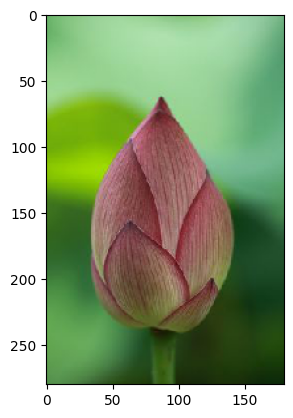

In [14]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model100=load_model("/content/drive/MyDrive/Colab Notebooks/recongnize_flowers.h5")

import numpy as np
class_name = ['Rose','apricot','daisy','lotus','water lily']

img = load_img('/content/drive/MyDrive/Hoa_Data/lotus/0910b96d59d9a1866eb898e5d10d9cec.jpg',target_size=(280,180))
plt.imshow(img)

img=img_to_array(img)
img=img.reshape(1,280,180,3)
img=img.astype('float32')
img=img/255

predict = model100.predict(img)

print("This is: ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))